In [17]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
df = pd.read_csv('Data_2.csv', sep = ';')
df.head(5)

,id_client,flag_conv
0,1345321,0
1,1345322,0
2,1345330,0
3,1345338,1
4,1345342,0


In [18]:
### 1. Анализ зависимости пользования предложением от идентификатора клиента
df['right_symbol'] = df['id_client'].astype(str).str[-1]
df.head(5)

,id_client,flag_conv,right_symbol
0,1345321,0,1
1,1345322,0,2
2,1345330,0,0
3,1345338,1,8
4,1345342,0,2


In [19]:
df_r=df.groupby(['right_symbol']).sum()
df_r

,id_client,flag_conv
right_symbol,,
0,427529240,315
1,437052023,195
2,418133048,168
3,403251464,162
4,424886326,166
5,443840420,179
6,460060880,180
7,419478870,196
8,415419696,173


In [24]:
df_count=df.groupby(['right_symbol']).count()
df_count

,id_client,flag_conv
right_symbol,,
0,316,316
1,323,323
2,309,309
3,298,298
4,314,314
5,328,328
6,340,340
7,310,310
8,307,307


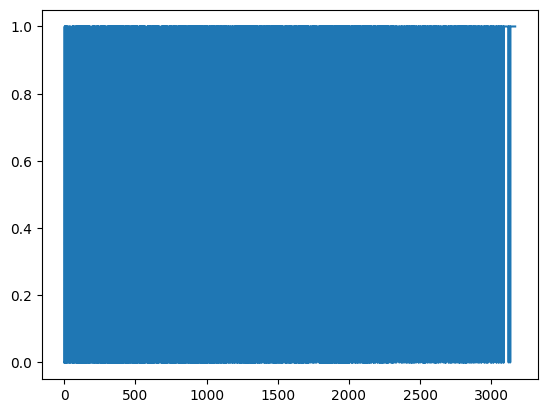

In [22]:
plt.plot(df['flag_conv'])
plt.show()

In [ ]:
### Наблюдается ~2-кратное преобладание id_client с окончание на цифру "0"

In [ ]:
### Введём функцию оценки существенности разницы в группах
def conclusion(s1):
    if s1 >=-1.96 and s <= 1.96:
        print ('   -> Разница в группах несущественна, сетап нашего эксперимента верный')
    else:
        print ('   -> Разница в группах существенна, сетап нашего эксперимента неверный')

In [ ]:
### 2. Разбиение по группам (контроль и тест) в зависимости от остатка деления идентификатора на 10

In [ ]:
### df_1 = df.loc[df['right_symbol'].isin(('0','1','2','3','4'))] ### контрольная группа
### df_2 = df.loc[df['right_symbol'].isin(('5','6','7','8','9'))] ### тестовая группа

In [ ]:
### df_1.head(5)

In [ ]:
### df_2.head(5)

In [ ]:
s, p = ttest_ind(df[df['right_symbol'].isin(('0','1','2','3','4'))]['flag_conv'],
                 df[df['right_symbol'].isin(('5','6','7','8','9'))]['flag_conv'])
print('p=', p,'   s=', s)

p= 0.00017195329628373794    s= 3.761500955083385


In [ ]:
conclusion(s)

   -> Разница в группах существенна, сетап нашего эксперимента неверный


In [ ]:
### 3. Разбиение по группам (контроль и тест) в зависимости от  четности идентификатора

In [ ]:
### df_3 = df.loc[df['right_symbol'].isin(('0','2','4','6','8'))] ### контрольная группа
### df_4 = df.loc[df['right_symbol'].isin(('1','3','5','7','9'))] ### тестовая группа
s, p = ttest_ind(df[df['right_symbol'].isin(('0','2','4','6','8'))]['flag_conv'],
                 df[df['right_symbol'].isin(('1','3','5','7','9'))]['flag_conv'])
print('p=', p,'   s=', s)

p= 0.021306090686166332    s= 2.303661902563631


In [ ]:
conclusion(s)

   -> Разница в группах существенна, сетап нашего эксперимента неверный


In [ ]:
### 4. Разбиение клиентов по группам (контроль и тест) с помощью функции sample из библиотеки pandas
df_aa = pd.DataFrame(columns=['iter','stat_crit','p_value'])

for i in range(1,1000):
    part_50 = df.sample(frac = 0.5)
    rest_part_50 = df.drop(part_50.index)
    s_a, p_a = ttest_ind(part_50['flag_conv'], rest_part_50['flag_conv'])
    df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)       

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_5880\1634996616.py:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [ ]:
df_aa

,iter,stat_crit,p_value
0,1.0,-0.159906,0.872965
1,2.0,-2.348368,0.018917
2,3.0,1.079265,0.280552
3,4.0,-0.232788,0.815941
4,5.0,0.641824,0.521034
...,...,...,...
994,995.0,0.131618,0.895295
995,996.0,-0.087025,0.930657
996,997.0,1.808808,0.070576
997,998.0,0.350267,0.726162


In [ ]:
df_aa[df_aa['p_value']<=0.05].count() /df_aa.count()

iter         0.037037
stat_crit    0.037037
p_value      0.037037
dtype: float64

In [ ]:
### Статистически значимая разница между контролем и тестом в АА-тесте наблюдается в 3.7% случаев

In [ ]:
### Cколько наблюдений потребуется для проведения АБ Теста, при условии что MDE = 2 пп
### альфа и бета установлены на дефолтном уровне, дисперсия выборки не изменится от воздействия В

In [ ]:
MDE = 0.02
p = df['flag_conv'].sum() / df['flag_conv'].count()
sigma = p*(1-p)
D= sigma**2
print ('p=',p,'D=', D)

p= 0.6118649416219628 D= 0.0563997117365393


In [ ]:
n = 16*D/(MDE*MDE)
n

2255.988469461572

In [ ]:
### Для проведения АБ Теста потребуется 2255 наблюдений.